In [1]:
# 构建一个玩具数据集
corpus = ["我特别特别喜欢看电影",
        "这部电影真的是很好看的电影",
        "今天天气真好是难得的好天气",
        "我今天去看了一部电影",
        "电影院的电影都很好看"]

In [2]:
# 对句子进行分词
import jieba # 导入 jieba 包
# 使用 jieba.cut 进行分词，并将结果转换为列表，存储在 corpus_tokenized 中
corpus_tokenized = [list(jieba.cut(sentence)) for sentence in corpus]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HUANGJ~1.ARE\AppData\Local\Temp\jieba.cache
Loading model cost 0.451 seconds.
Prefix dict has been built successfully.


In [3]:
# 创建词汇表
word_dict = {} # 初始化词汇表
# 遍历分词后的语料库
for sentence in corpus_tokenized:
    for word in sentence:
        # 如果词汇表中没有该词，则将其添加到词汇表中
        if word not in word_dict:
            word_dict[word] = len(word_dict) # 分配当前词汇表索引
print(" 词汇表：", word_dict) # 打印词汇表

 词汇表： {'我': 0, '特别': 1, '喜欢': 2, '看': 3, '电影': 4, '这部': 5, '真的': 6, '是': 7, '很': 8, '好看': 9, '的': 10, '今天天气': 11, '真好': 12, '难得': 13, '好': 14, '天气': 15, '今天': 16, '去': 17, '了': 18, '一部': 19, '电影院': 20, '都': 21}


In [4]:
# 根据词汇表将句子转换为词袋表示
bow_vectors = [] # 初始化词袋表示
# 遍历分词后的语料库
for sentence in corpus_tokenized:
    # 初始化一个全 0 向量，其长度等于词汇表大小
    sentence_vector = [0] * len(word_dict)
    for word in sentence:
        # 将对应词的索引位置加 1，表示该词在当前句子中出现了一次
        sentence_vector[word_dict[word]] += 1
    # 将当前句子的词袋向量添加到向量列表中
    bow_vectors.append(sentence_vector)
print(" 词袋表示：", bow_vectors) # 打印词袋表示

 词袋表示： [[1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]


In [5]:
# 导入 numpy 库，用于计算余弦相似度
import numpy as np 
# 定义余弦相似度函数
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2) # 计算向量 vec1 和 vec2 的点积
    norm_a = np.linalg.norm(vec1) # 计算向量 vec1 的范数
    norm_b = np.linalg.norm(vec2) # 计算向量 vec2 的范数  
    return dot_product / (norm_a * norm_b) # 返回余弦相似度
# 初始化一个全 0 矩阵，用于存储余弦相似度
similarity_matrix = np.zeros((len(corpus), len(corpus)))
# 计算每两个句子之间的余弦相似度
for i in range(len(corpus)):
    for j in range(len(corpus)):
        similarity_matrix[i][j] = cosine_similarity(bow_vectors[i], 
                                                    bow_vectors[j])

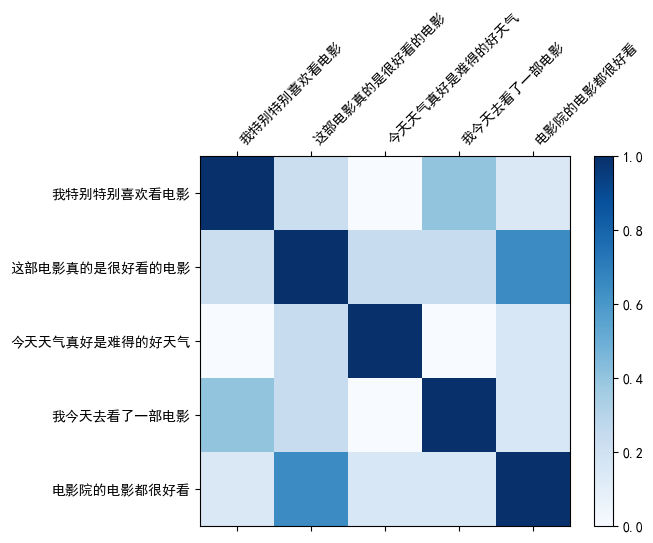

In [6]:
# 导入 matplotlib 库，用于可视化余弦相似度矩阵
import matplotlib.pyplot as plt
plt.rcParams["font.family"]=['SimHei'] # 用来设定字体样式
plt.rcParams['font.sans-serif']=['SimHei'] # 用来设定无衬线字体样式
plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
fig, ax = plt.subplots() # 创建一个绘图对象
# 使用 matshow 函数绘制余弦相似度矩阵，颜色使用蓝色调
cax = ax.matshow(similarity_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax) # 条形图颜色映射
ax.set_xticks(range(len(corpus))) # x 轴刻度
ax.set_yticks(range(len(corpus))) # y 轴刻度
ax.set_xticklabels(corpus, rotation=45, ha='left') # 刻度标签 
ax.set_yticklabels(corpus) # 刻度标签为原始句子
plt.show() # 显示图形